<a href="https://colab.research.google.com/github/asgardsun/Content-Based-Recommendation/blob/main/2_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###기초 통계

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/recommendation/data/ratings.csv')
ratings.sample()
#timestamp란? 유저들이 한번에(같은 시간에) 기록한 데이터

,userId,movieId,rating,timestamp
26889,182,5349,3.0,1055151103


In [ ]:
ratings.shape # 총 100836의 데이터

(100836, 4)

In [ ]:
print(len(ratings['userId'].unique())) # 610명의 유저 데이터 (중복제거)
print(len(ratings['movieId'].unique())) # 9724개의 영화 데이터(중복제거)

610
9724


In [ ]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
%matplotlib inline

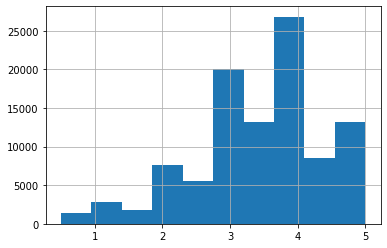

In [ ]:
ratings['rating'].hist()

#평점의 분포



### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [ ]:
users = ratings.groupby('userId')['movieId'].count()
users[:5]

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [ ]:
users.describe() #총 610명 평균은 165.3개 가장 적게 남긴 사람은 20개, 최고값은 2698개 

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


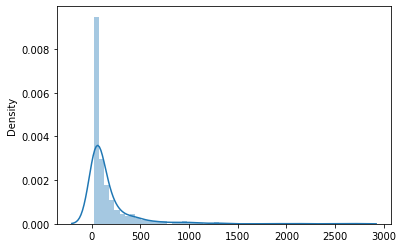

In [ ]:
import seaborn as sns

#poewr law distribution, 멱함수 분포
sns.distplot(users.values)

###사람들이 많이 보는 영화는?

In [ ]:
films = ratings.groupby('movieId')['userId'].count()
films[:5]

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

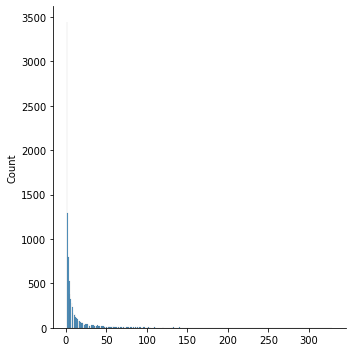

In [ ]:
sns.displot(films.values)

In [ ]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

###유저별 평점 패턴 분석

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/recommendation/data/movies.csv',index_col='movieId')

In [ ]:
movies.loc[[356, 318, 296, 593, 2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


###겨울왕국 평점보기

In [ ]:
#movieId = 106696
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [ ]:
frozen = ratings[ratings['movieId'] == 106696]

In [ ]:
len(frozen)

29

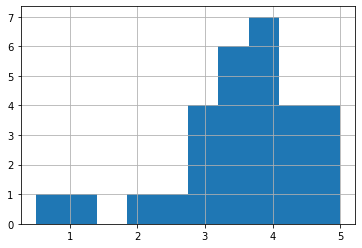

In [ ]:
frozen['rating'].hist()

In [ ]:
frozen

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176
16798,105,106696,3.5,1447563589
21852,141,106696,3.0,1513129988
21967,143,106696,4.0,1444768621
22567,153,106696,2.5,1525552648
23219,159,106696,3.0,1508640298
25783,177,106696,5.0,1435529765
35769,241,106696,4.0,1447540037


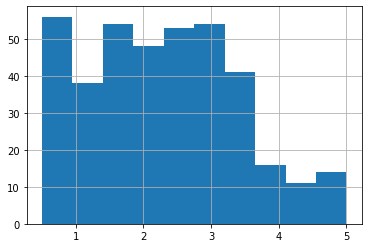

In [ ]:
ratings.loc[ratings['userId'] == 567, 'rating'].hist()

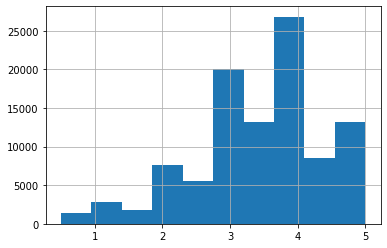

In [ ]:
ratings['rating'].hist()